# data prep for Introduction to GeoPandas

In [1]:
import geopandas as gpd
import shapely
import pandas as pd
import fiona

## clip river files and state boundaries

In [2]:
gdf_rivers = gpd.read_file("data/natural_earth_rivers/ne_10m_rivers_lake_centerlines/ne_10m_rivers_lake_centerlines.shp")
gdf_rivers

,dissolve,scalerank,featurecla,name,name_alt,rivernum,note,min_zoom,name_en,min_label,...,name_sv,name_tr,name_vi,name_zh,name_fa,name_he,name_uk,name_ur,name_zht,geometry
0,975River,9,River,None,None,975,None,7.1,None,8.1,...,None,None,None,None,None,None,None,None,None,"LINESTRING (22.75649 -20.47161, 22.79458 -20.4..."
1,976River,9,River,Rungwa,None,976,None,7.1,Rungwa,8.1,...,Rungwa,Rungwa,Sông Rungwa,伦瓜河,رونگوا,רונגווה,Рунгва,رنگوا,倫瓜河,"MULTILINESTRING ((32 -7.24993, 32.02793 -7.238..."
2,977River,9,River,Ligonha,None,977,None,7.1,Ligonha,8.1,...,Ligonha,Ligonha,Sông Ligonha,利戈尼亚河,لیگونها,ליגונה,Лігонха,لیگونہا,利戈尼亞河,"MULTILINESTRING ((39.12783 -16.86663, 39.12598..."
3,978River,9,River,Dongwe,None,978,None,7.1,Dongwe,8.1,...,Dongwe,Dongwe,Sông Dongwe,松威河,دونگوه,דונגווה,Донгве,ڈانگوے,東威河,"LINESTRING (25.5333 -14.58333, 25.49502 -14.59..."
4,979River,9,River,Cuito,None,979,None,7.1,Cuito,8.1,...,Cuito,Cuito,Sông Cuito,奎托河,کیتو,קיטו,Куіто,کیوٹو,奎托河,"MULTILINESTRING ((20.75 -17.99993, 20.75234 -1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,8River,1,River,Missouri,None,8,None,2.0,Missouri,3.0,...,Missourifloden,Missouri,Missouri,密蘇里河,رودخانه میزوری,מיזורי,Міссурі,دریائے مسوری,密蘇里河,"MULTILINESTRING ((-108.1906 47.60175, -108.249..."
1469,22561Salinas,10,River,Salinas,None,22561,Version 1.2 edit in N. America and Europe,7.2,Salinas,8.2,...,Salinas River,Salinas,Sông Salinas,萨利纳斯河,سالیناس,סאלינאס,Салінас,سالیناس,萨利纳斯河,"LINESTRING (-120.88884 36.00002, -120.85425 35..."
1470,1121River,9,River,Rio Batepito,None,1121,None,7.1,Batevito,8.1,...,Rio Batepito,Rio Batepito,Sông Rio Batepito,巴特皮托河,ریو باتپیتو,ריו באטיפו,Ріо-Батепіто,ریو باٹیپیٹو,巴特皮托河,"LINESTRING (-109.19028 31.57971, -109.20256 31..."
1471,21320Lake Centerline,11,Lake Centerline,None,None,21320,ID is link back to CEC data,6.7,None,7.7,...,None,None,None,None,None,None,None,None,None,"MULTILINESTRING ((-106.83016 62.51925, -106.86..."


In [3]:
gdf_rivers.columns

Index(['dissolve', 'scalerank', 'featurecla', 'name', 'name_alt', 'rivernum',
       'note', 'min_zoom', 'name_en', 'min_label', 'ne_id', 'label',
       'wikidataid', 'name_ar', 'name_bn', 'name_de', 'name_es', 'name_fr',
       'name_el', 'name_hi', 'name_hu', 'name_id', 'name_it', 'name_ja',
       'name_ko', 'name_nl', 'name_pl', 'name_pt', 'name_ru', 'name_sv',
       'name_tr', 'name_vi', 'name_zh', 'name_fa', 'name_he', 'name_uk',
       'name_ur', 'name_zht', 'geometry'],
      dtype='object')

In [4]:
gdf_rivers.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

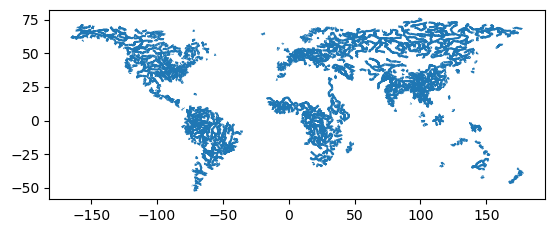

In [5]:
gdf_rivers.plot()

In [6]:
clip_box = gpd.GeoDataFrame(geometry=[shapely.box(-92.5,29,-87.5,35.5)])
clip_box

,geometry
0,"POLYGON ((-87.5 29, -87.5 35.5, -92.5 35.5, -9..."


In [7]:
clip_box.set_crs('epsg:4326',inplace=True)
clip_box.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
gdf_rivers_ms = gpd.clip(gdf_rivers,clip_box)
gdf_rivers_ms

,dissolve,scalerank,featurecla,name,name_alt,rivernum,note,min_zoom,name_en,min_label,...,name_sv,name_tr,name_vi,name_zh,name_fa,name_he,name_uk,name_ur,name_zht,geometry
1244,916River,8,River,Bayou Lafourche,None,916,None,7.0,Bayou Lafourche,8.0,...,Bayou Lafourche,Bayou Lafourche,Bayou Lafourche,拉福什河,بایولافورچه,באיו לָפורצ'ה,Бая-Лафорше,بیو لافورچے,拉福什河,"LINESTRING (-90.16167 29.11892, -90.19419 29.1..."
1314,528River,7,River,Pearl,None,528,None,6.0,Pearl,7.0,...,Pearl River,Pearl,Sông Pearl,珀爾河,پیرل,פרל,Перл,پرل,珀爾河,"MULTILINESTRING ((-89.13982 33.17018, -89.1194..."
1371,251River,6,River,Alabama,None,251,None,5.0,Alabama,6.0,...,Alabama River,Alabama,Alabama,阿拉巴馬河,آلاباما,נהר אלבמה,Алабама,البامہ,阿拉巴馬河,"MULTILINESTRING ((-87.5 31.92149, -87.50872 31..."
1189,710River,8,River,Tombigbee,None,710,None,7.0,Tombigbee,8.0,...,Tombigbee,Tombigbee,Sông Tombigbee,汤比格比河,تومبیگبی,טומביגבי,Томбіґбі,ٹومبیگبی,湯比格比河,"LINESTRING (-88.2832 34.70515, -88.26279 34.66..."
1296,414River,7,River,Red,None,414,None,6.0,Red of the South,7.0,...,Red,Red,Red,红河,رود رد استوور,הנהר האדום,Ред-Ривер,ریڈ,紅河,"LINESTRING (-92.5 31.3471, -92.49521 31.34443,..."
1464,3River,1,River,Mississippi,None,3,None,2.0,Mississippi,3.0,...,Mississippifloden,Mississippi,Mississippi,密西西比河,رودخانه میسیسیپی,מיסיסיפי,Міссісіпі,دریائے مسیسپی,密西西比河,"MULTILINESTRING ((-89.18823 29.31879, -89.2571..."
1224,796River,8,River,White,None,796,None,7.0,White,8.0,...,White River,White,Sông White,白河,رود وایت,וואייט,Вайт,دریائے وائٹ,白河,"MULTILINESTRING ((-91.37105 35.5, -91.36809 35..."
1448,131River,4,River,Arkansas,None,131,None,4.0,Arkansas,5.0,...,Arkansas,Arkansas,Arkansas,阿肯色河,رود آرکانزاس,ארקנסו,Арканзас,دریائے آرکنساس,阿肯色河,"MULTILINESTRING ((-92.5 34.97423, -92.49834 34..."
1430,169River,5,River,Tennessee,None,169,None,4.7,Tennessee,5.7,...,Tennesseefloden,Tennessee,Tennessee,田纳西河,رودخانه تنسی,טנסי,Теннессі,دریائے ٹینیسی,田納西河,"LINESTRING (-87.97975 35.5, -87.98162 35.49274..."
1429,169Lake Centerline,5,Lake Centerline,Tennessee,None,169,None,4.7,Tennessee,5.7,...,Tennesseefloden,Tennessee,Tennessee,田纳西河,رودخانه تنسی,טנסי,Теннессі,دریائے ٹینیسی,田納西河,"LINESTRING (-87.70044 34.77338, -87.68535 34.7..."


<Axes: >

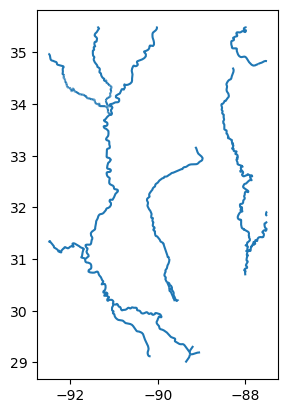

In [9]:
gdf_rivers_ms.plot()

<Axes: >

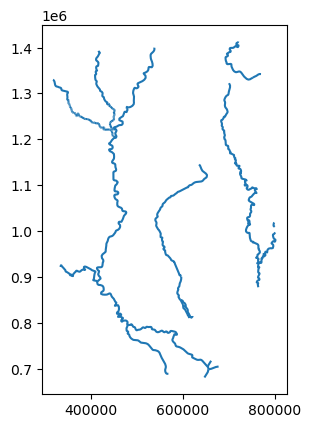

In [10]:
gdf_rivers_ms.to_crs('epsg:5070',inplace=True)
gdf_rivers_ms.plot()

In [11]:
gdf_rivers_supp = gpd.read_file("data/natural_earth_rivers/ne_10m_rivers_north_america/ne_10m_rivers_north_america.shp")
gdf_rivers_supp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
gdf_rivers_supp

,strokeweig,name,featurecla,scalerank,min_zoom,min_label,ne_id,rivernum,dissolve,name_alt,...,name_sv,name_tr,name_vi,name_zh,name_fa,name_he,name_uk,name_ur,name_zht,geometry
0,0.15,North Fork Salt,River,12,7.0,8.0,1746333385,NaN,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (-92.5509 40.4038, -92.54093 40.394..."
1,0.20,North Fork Salt,River,12,7.0,8.0,1746333389,NaN,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (-92.43139 40.20166, -92.39932 40.1..."
2,0.20,Salt,River,12,7.0,8.0,1159139641,22682.0,22682River,None,...,None,None,None,索尔特河,سالت ریور,None,None,None,索爾特河,"LINESTRING (-91.06926 39.4743, -91.08555 39.47..."
3,0.15,Spring,River,12,7.0,8.0,1746333393,NaN,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (-93.73056 36.93656, -93.76206 36.9..."
4,0.20,Spring,River,12,7.0,8.0,1746333395,NaN,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (-93.90136 37.1241, -93.91769 37.13..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4892,0.20,None,Lake Centerline,12,7.0,8.0,1159142171,23268.0,23268River,None,...,None,None,None,None,None,None,None,None,None,None
4893,0.20,None,Lake Centerline,12,7.0,8.0,1159135221,21689.0,21689River,None,...,None,None,None,None,None,None,None,None,None,"MULTILINESTRING ((-72.04102 67.71504, -72.0408..."
4894,0.20,None,Lake Centerline,11,6.7,7.7,1729949155,21320.0,21320River,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (-71.59912 68.78357, -71.59311 68.7..."
4895,0.20,Ekatuk,Lake Centerline,12,7.0,8.0,1159136121,21891.0,21891River,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (-106.17403 71.72868, -106.20403 71..."


In [13]:
gdf_rivers_supp = gpd.clip(gdf_rivers_supp,clip_box)

In [14]:
gdf_rivers_supp.to_crs('epsg:5070',inplace=True)

<Axes: >

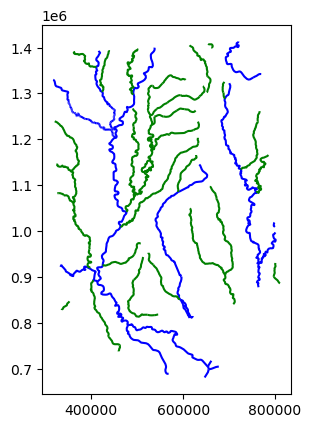

In [17]:
ax = gdf_rivers_ms.plot(color='blue')
gdf_rivers_supp.plot(ax=ax,color='green')

In [18]:
gdf_rivers_supp.columns

Index(['strokeweig', 'name', 'featurecla', 'scalerank', 'min_zoom',
       'min_label', 'ne_id', 'rivernum', 'dissolve', 'name_alt', 'note',
       'name_full', 'label', 'wikidataid', 'name_ar', 'name_bn', 'name_de',
       'name_en', 'name_es', 'name_fr', 'name_el', 'name_hi', 'name_hu',
       'name_id', 'name_it', 'name_ja', 'name_ko', 'name_nl', 'name_pl',
       'name_pt', 'name_ru', 'name_sv', 'name_tr', 'name_vi', 'name_zh',
       'name_fa', 'name_he', 'name_uk', 'name_ur', 'name_zht', 'geometry'],
      dtype='object')

In [19]:
gdf_rivers_ms.columns

Index(['dissolve', 'scalerank', 'featurecla', 'name', 'name_alt', 'rivernum',
       'note', 'min_zoom', 'name_en', 'min_label', 'ne_id', 'label',
       'wikidataid', 'name_ar', 'name_bn', 'name_de', 'name_es', 'name_fr',
       'name_el', 'name_hi', 'name_hu', 'name_id', 'name_it', 'name_ja',
       'name_ko', 'name_nl', 'name_pl', 'name_pt', 'name_ru', 'name_sv',
       'name_tr', 'name_vi', 'name_zh', 'name_fa', 'name_he', 'name_uk',
       'name_ur', 'name_zht', 'geometry'],
      dtype='object')

In [20]:
gdf_rivers_supp.drop(columns=['name_ar', 'name_bn', 'name_de','name_es', 
                              'name_fr', 'name_el', 'name_hi', 'name_hu',
                              'name_id', 'name_it', 'name_ja', 'name_ko', 
                              'name_nl', 'name_pl','name_pt', 'name_ru', 
                              'name_sv', 'name_tr', 'name_vi', 'name_zh',
                              'name_fa', 'name_he', 'name_uk', 'name_ur', 
                              'name_zht','name_en','strokeweig','min_zoom','min_label','dissolve','name_alt','note','name_full','label'],inplace=True)
gdf_rivers_ms.drop(columns=['name_ar', 'name_bn', 'name_de','name_es', 
                              'name_fr', 'name_el', 'name_hi', 'name_hu',
                              'name_id', 'name_it', 'name_ja', 'name_ko', 
                              'name_nl', 'name_pl','name_pt', 'name_ru', 
                              'name_sv', 'name_tr', 'name_vi', 'name_zh',
                              'name_fa', 'name_he', 'name_uk', 'name_ur', 
                              'name_zht','name_en','dissolve','name_alt','note','min_zoom','min_label','label'],inplace=True)

In [21]:
any(gdf_rivers_ms.wikidataid.isin(gdf_rivers_supp.wikidataid))

False

In [22]:
any(gdf_rivers_ms.ne_id.isin(gdf_rivers_supp.ne_id))

False

In [ ]:
# gdf_rivers_ms.drop(columns=['dissolve','name_alt','note','min_zoom','min_label','label'],inplace=True)
# gdf_rivers_supp.drop(columns=['strokeweig','min_zoom','min_label','dissolve','name_alt','note','name_full','label'],inplace=True)

In [23]:
gdf_rivers_ms

,scalerank,featurecla,name,rivernum,ne_id,wikidataid,geometry
1244,8,River,Bayou Lafourche,916,1159128577,Q2892300,"LINESTRING (568357.042 689163.124, 565180.878 ..."
1314,7,River,Pearl,528,1159122089,Q1739672,"MULTILINESTRING ((635175.29 1145225.449, 63724..."
1371,6,River,Alabama,251,1159114979,Q558643,"MULTILINESTRING ((799076.718 1018795.098, 7983..."
1189,8,River,Tombigbee,710,1159126229,Q2297877,"LINESTRING (700410.717 1322268.779, 702668.212..."
1296,7,River,Red,414,1159119701,Q156032,"LINESTRING (331751.24 925190.299, 332215.567 9..."
1464,1,River,Mississippi,3,1159119147,Q1497,"MULTILINESTRING ((661384.266 717552.704, 65536..."
1224,8,River,White,796,1159127545,Q1813795,"MULTILINESTRING ((416109.469 1392893.462, 4164..."
1448,4,River,Arkansas,131,1159112219,Q8319,"MULTILINESTRING ((316844.853 1329753.717, 3169..."
1430,5,River,Tennessee,169,1159113053,Q193737,"LINESTRING (720391.934 1413173.635, 720293.29 ..."
1429,5,Lake Centerline,Tennessee,169,1159113035,Q193737,"LINESTRING (752509.382 1334329.24, 753802.307 ..."


In [24]:
gdf_rivers_supp

,name,featurecla,scalerank,ne_id,rivernum,wikidataid,geometry
1888,Perdido,River,11,1159138405,22399.0,None,"LINESTRING (797673.143 900649.647, 798150.805 ..."
1892,Pascagoula,River,10,1159138355,22388.0,Q55262,"LINESTRING (691424.369 905048.428, 691628.012 ..."
358,Perdido,River,11,1746334191,NaN,Q3294510,"LINESTRING (800810.121 930673.748, 800685.269 ..."
1890,Leaf,River,10,1159138497,22419.0,Q1810486,"LINESTRING (617461.043 1021658.26, 617118.383 ..."
1891,Chickasawhay,River,11,1159138501,22420.0,Q1072169,"LINESTRING (691424.369 905048.428, 692260.895 ..."
...,...,...,...,...,...,...,...
3941,St. Francis,River,10,1159108133,23283.0,Q1108022,"LINESTRING (499575.978 1397371.49, 499957.074 ..."
1910,Hatchie,River,11,1159139009,22539.0,Q5681137,"LINESTRING (613963.025 1404839.47, 614746.904 ..."
50,Little Red,River,12,1746333499,NaN,Q6651505,"LINESTRING (364723.209 1390543.547, 363354.685..."
1960,Cache,River,11,1159139021,22542.0,Q5015966,"LINESTRING (438432.924 1394010.936, 438485.073..."


In [25]:
gdf_out=pd.concat([gdf_rivers_ms,gdf_rivers_supp],ignore_index=True)
gdf_out

,scalerank,featurecla,name,rivernum,ne_id,wikidataid,geometry
0,8,River,Bayou Lafourche,916.0,1159128577,Q2892300,"LINESTRING (568357.042 689163.124, 565180.878 ..."
1,7,River,Pearl,528.0,1159122089,Q1739672,"MULTILINESTRING ((635175.29 1145225.449, 63724..."
2,6,River,Alabama,251.0,1159114979,Q558643,"MULTILINESTRING ((799076.718 1018795.098, 7983..."
3,8,River,Tombigbee,710.0,1159126229,Q2297877,"LINESTRING (700410.717 1322268.779, 702668.212..."
4,7,River,Red,414.0,1159119701,Q156032,"LINESTRING (331751.24 925190.299, 332215.567 9..."
...,...,...,...,...,...,...,...
70,10,River,St. Francis,23283.0,1159108133,Q1108022,"LINESTRING (499575.978 1397371.49, 499957.074 ..."
71,11,River,Hatchie,22539.0,1159139009,Q5681137,"LINESTRING (613963.025 1404839.47, 614746.904 ..."
72,12,River,Little Red,NaN,1746333499,Q6651505,"LINESTRING (364723.209 1390543.547, 363354.685..."
73,11,River,Cache,22542.0,1159139021,Q5015966,"LINESTRING (438432.924 1394010.936, 438485.073..."


In [26]:
gdf_out.to_file('data/natural_earth_rivers/ms_clipped_major_rivers/ms_clipped_major_rivers.shp')

# subset cb states

In [27]:
gdf_states = gpd.read_file("data/state_boundaries/cb_2023_us_state_500k/cb_2023_us_state_500k.shp")
gdf_states = gdf_states.loc[gdf_states.STUSPS.isin(['MS','LA','AR','AL','TN'])]
gdf_states

,STATEFP,STATENS,GEOIDFQ,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
4,01,01779775,0400000US01,01,AL,Alabama,00,131185049346,4582326383,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
6,05,00068085,0400000US05,05,AR,Arkansas,00,134660466558,3122251184,"POLYGON ((-94.61792 36.49941, -94.61765 36.499..."
12,47,01325873,0400000US47,47,TN,Tennessee,00,106792311478,2322248149,"POLYGON ((-90.31045 35.0027, -90.30926 35.0095..."
51,28,01779790,0400000US28,28,MS,Mississippi,00,121533540877,3914738613,"MULTIPOLYGON (((-88.50502 30.21574, -88.49164 ..."
55,22,01629543,0400000US22,22,LA,Louisiana,00,111930452904,23721187320,"MULTIPOLYGON (((-88.8677 29.86155, -88.86566 2..."


In [28]:
gdf_states.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [29]:
gdf_states = gdf_states.to_crs('epsg:5070')


<Axes: >

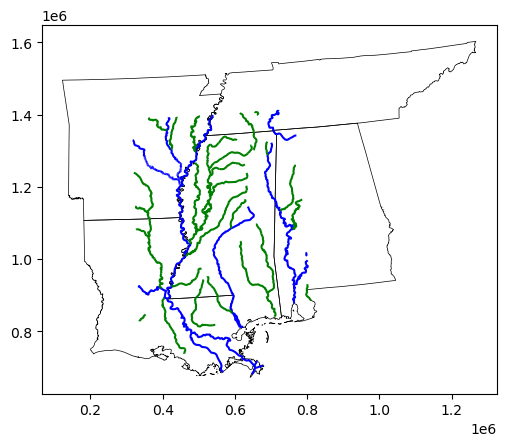

In [33]:
ax = gdf_rivers_ms.plot(color='blue')
gdf_rivers_supp.plot(ax=ax,color='green')
gdf_states.plot(ax=ax,facecolor='none',edgecolor='black',lw=0.5)

In [34]:
gdf_states.to_file('data/state_boundaries/MS_LA_AR_AL_TN_cb_2023_us_state_500km.shp')

# clip superfund sites

In [ ]:
input_gdb='data/EPA_superfund_boundaries/NPL_Boundaries.gdb'
layers=fiona.listlayers(input_gdb)
layers

In [ ]:
site_polys=gpd.read_file(input_gdb,layer='SITE_BOUNDARIES_SF')
site_polys = site_polys[site_polys.STATE_CODE.str.contains('MS')]
site_polys.head()

In [ ]:
site_polys.columns

In [ ]:
site_polys.drop(columns=['REGION_CODE','SITE_FEATURE_CLASS','SITE_FEATURE_NAME','LAST_CHANGE_DATE',
       'ORIGINAL_CREATION_DATE','STREET_ADDR_TXT', 'ADDR_COMMENT','SITE_CONTACT_NAME',
       'PRIMARY_TELEPHONE_NUM', 'SITE_CONTACT_EMAIL','SITE_FEATURE_SOURCE','FEATURE_INFO_URL',
       'FEATURE_INFO_URL_DESC','SF_GEOSPATIAL_DATA_DISCLAIMER','FEDERAL_FACILITY_DETER_CODE', 
                         'PROJECTION','SITE_FEATURE_TYPE','SITE_FEATURE_DESCRIPTION','Shape_Length','Shape_Area',],inplace=True)
site_polys

In [ ]:
site_polys.crs

In [ ]:
site_polys.reset_index(drop=True,inplace=True)
site_polys

In [ ]:
site_polys.to_file('data/EPA_superfund_boundaries/MS_EPA_NPL_Site_Boundaries.gdb',driver='OpenFileGDB')

In [ ]:
import openpyxl
import pandas as pd

In [ ]:
df_toxic = pd.read_csv('data/epa_brownfields_ms/STATE_SINGLE_MS.csv')
df_toxic

In [ ]:
df_toxic.dropna(subset=['LATITUDE83','LONGITUDE83'],inplace=True)
df_toxic

In [ ]:
df_toxic.columns

In [ ]:
df_toxic.dropna(subset=['HDATUM_DESC'],inplace=True)
df_toxic

In [ ]:
df_toxic.HDATUM_DESC.unique()

In [ ]:
df_toxic.SITE_TYPE_NAME.unique()

In [ ]:
df_toxic.INTEREST_TYPES.unique()

In [ ]:
df_toxic.INTEREST_TYPES.dtype

In [ ]:
df_toxic.INTEREST_TYPES.fillna('',inplace=True)

In [ ]:
df_toxic[df_toxic.INTEREST_TYPES.isin(['TRI REPORTER','TSCA SUBMITTER'])]
# df_toxic.query("INTEREST_TYPES.str.contains('TRI')")

In [ ]:
df_toxic.drop(columns=['LOCATION_ADDRESS', 'SUPPLEMENTAL_LOCATION', 'CITY_NAME','FIPS_CODE', 'STATE_CODE',
                       'COUNTRY_NAME','EPA_REGION_CODE','CREATE_DATE', 'UPDATE_DATE', 'US_MEXICO_BORDER_IND',
                       'CONVEYOR','COLLECT_DESC', 'ACCURACY_VALUE','SOURCE_DESC','PGM_SYS_ACRNMS',
                       'NAICS_CODES', 'NAICS_CODE_DESCRIPTIONS','SIC_CODES','SIC_CODE_DESCRIPTIONS',
                       'FEDERAL_FACILITY_CODE', 'FEDERAL_AGENCY_NAME', 'TRIBAL_LAND_CODE','TRIBAL_LAND_NAME',
                       'LOCATION_DESCRIPTION'],inplace=True)
df_toxic

In [ ]:
df_toxic = df_toxic[df_toxic.INTEREST_TYPES.isin(['TRI REPORTER','TSCA SUBMITTER'])]
df_toxic

In [ ]:
# import fiona
# layers=fiona.listlayers("data/acres_frs/ACRES_FRS.kml")
# layers

In [ ]:
# gdf_toxic = gpd.read_file("data/acres_frs/ACRES_FRS.kml", driver="KML")
# gdf_toxic

In [ ]:
study_area = gdf_states.geometry.union_all()
study_area

In [ ]:
gdf_rivers_ms = gpd.clip(gdf_rivers,ms)
gdf_rivers_ms

In [ ]:
# gdf_ms = gpd.read_file("data/tl_2016_28_cousub/tl_2016_28_cousub.shp")
# gdf_ms.head()

In [ ]:
gdf_ms.plot()

In [ ]:
gdf_ms.crs

In [ ]:
gdf_ms = gdf_ms.to_crs('epsg:5070')
gdf_ms.crs

In [ ]:
ms = gdf_ms.geometry.union_all()
ms

In [ ]:
gdf_rivers = gdf_rivers.to_crs('epsg:5070')
gdf_rivers.crs

In [ ]:
gdf_rivers_ms = gpd.clip(gdf_rivers,ms)
gdf_rivers_ms

In [ ]:
gdf_rivers_ms.plot()